In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data Overview

In [102]:
bnb = pd.read_csv('Data/airbnb.csv')
bnb

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


# Data Inspection

In [15]:
bnb.shape

(48895, 16)

In [16]:
bnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [91]:
bnb['id']=bnb['id'].apply(str)
bnb['host_id']=bnb['host_id'].apply(str)

In [100]:
bnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48895 non-null  object        
 1   host_id                         48895 non-null  object        
 2   neighbourhood_group             48895 non-null  object        
 3   neighbourhood                   48895 non-null  object        
 4   latitude                        48895 non-null  float64       
 5   longitude                       48895 non-null  float64       
 6   room_type                       48895 non-null  object        
 7   price                           48895 non-null  int64         
 8   minimum_nights                  48895 non-null  int64         
 9   number_of_reviews               48895 non-null  int64         
 10  last_review                     48895 non-null  datetime64[ns]
 11  re

In [48]:
bnb['last_review'] = pd.to_datetime(bnb['last_review'])

In [34]:
bnb.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,0.054530,0.046157,240.154170,20.510550,44.550582,1.497775,32.952519,131.622289
min,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,0.280000,1.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,1.220000,1.000000,45.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [43]:
bnb.describe(include='all')

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Tag
count,48895,48895,48895,48895,48895.000000,48895.000000,48895,48895.000000,48895.000000,48895.000000,48895,48895.000000,48895.000000,48895.000000,48895
unique,48895,37457,5,221,NaN,NaN,3,NaN,NaN,NaN,1764,NaN,NaN,NaN,3
top,7074961,219517861,Manhattan,Williamsburg,NaN,NaN,Entire home/apt,NaN,NaN,NaN,2019-06-23 00:00:00,NaN,NaN,NaN,Cheap
freq,1,327,21661,3920,NaN,NaN,25409,NaN,NaN,NaN,11465,NaN,NaN,NaN,31910
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-03-28 00:00:00,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-07-08 00:00:00,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,40.728949,-73.952170,NaN,152.720687,7.029962,23.274466,NaN,1.373221,7.143982,112.781327,NaN
std,NaN,NaN,NaN,NaN,0.054530,0.046157,NaN,240.154170,20.510550,44.550582,NaN,1.497775,32.952519,131.622289,NaN
min,NaN,NaN,NaN,NaN,40.499790,-74.244420,NaN,0.000000,1.000000,0.000000,NaN,0.010000,1.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,40.690100,-73.983070,NaN,69.000000,1.000000,1.000000,NaN,0.280000,1.000000,0.000000,NaN


# Data Statistic

In [96]:
 np.mean(bnb)

id                                       inf
host_id                                  inf
latitude                           40.728949
longitude                         -73.952170
price                             152.720687
minimum_nights                      7.029962
number_of_reviews                  23.274466
reviews_per_month                   1.373221
calculated_host_listings_count      7.143982
availability_365                  112.781327
dtype: float64

In [94]:
np.std(bnb)

latitude                            0.054530
longitude                           0.046156
price                             240.151714
minimum_nights                     20.510340
number_of_reviews                  44.550127
reviews_per_month                   1.497760
calculated_host_listings_count     32.952182
availability_365                  131.620943
dtype: float64

In [99]:
bnb.median()

id                                1.967728e+07
host_id                           3.079382e+07
latitude                          4.072307e+01
longitude                        -7.395568e+01
price                             1.060000e+02
minimum_nights                    3.000000e+00
number_of_reviews                 5.000000e+00
reviews_per_month                 1.220000e+00
calculated_host_listings_count    1.000000e+00
availability_365                  4.500000e+01
dtype: float64

In [40]:
np.min(bnb)

id                                           10000070
host_id                                       1000014
neighbourhood_group                             Bronx
neighbourhood                                Allerton
latitude                                      40.4998
longitude                                    -74.2444
room_type                             Entire home/apt
price                                               0
minimum_nights                                      1
number_of_reviews                                   0
last_review                       2011-03-28 00:00:00
reviews_per_month                                0.01
calculated_host_listings_count                      1
availability_365                                    0
Tag                                             Cheap
dtype: object

In [38]:
np.max(bnb)

id                                            9999939
host_id                                       9997988
neighbourhood_group                     Staten Island
neighbourhood                                Woodside
latitude                                      40.9131
longitude                                     -73.713
room_type                                 Shared room
price                                           10000
minimum_nights                                   1250
number_of_reviews                                 629
last_review                       2019-07-08 00:00:00
reviews_per_month                                58.5
calculated_host_listings_count                    327
availability_365                                  365
Tag                                            Medium
dtype: object

In [39]:
num = bnb.describe()
rsp = num.iloc[5:6]
rsp

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
50%,40.72307,-73.95568,106.0,3.0,5.0,1.22,1.0,45.0


# Handling Missing Value

In [45]:
bnb.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

#### Fill the missing value in reviews_per_month with the mean


In [106]:
bnb['reviews_per_month'] = bnb['reviews_per_month'].fillna(bnb['reviews_per_month'].mean())
bnb.isna().sum()

id                                 0
name                              16
host_id                            0
host_name                         21
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
last_review                        0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

#### Fill the missing value in last_review with the most common date


In [103]:
modus = bnb['last_review'].mode()
modus

0    2019-06-23
dtype: object

In [107]:
bnb['last_review'] = bnb['last_review'].fillna(bnb['last_review'].mode()[0])
bnb.isna().sum()

id                                 0
name                              16
host_id                            0
host_name                         21
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
last_review                        0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

#### Drop columns which has missing value that cannot be filled with any logical value 

In [51]:
bnb.dropna(axis=1,how='any',inplace=True)
bnb.isna().sum()

id                                0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [84]:
bnb

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.210000,6,365
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.380000,2,355
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2019-06-23,1.373221,1,365
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.640000,1,194
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.100000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,2019-06-23,1.373221,2,9
48891,36485057,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,2019-06-23,1.373221,2,36
48892,36485431,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,2019-06-23,1.373221,1,27
48893,36485609,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,2019-06-23,1.373221,6,2


# Data Filtering

#### Make category based on the price: Cheap, Medium, and Expensive


In [23]:
bnb['price'].mean()

152.7206871868289

In [24]:
kondisi = [
            (bnb['price']> 180),
            (bnb['price']<= 180) & (bnb['price'] >= 150),
            (bnb['price'] < 150)
            ]
choice = ['Expensive','Medium','Cheap']
bnb['Tag']= np.select(kondisi, choice)
bnb

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Tag
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.210000,6,365,Cheap
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.380000,2,355,Expensive
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2019-06-23,1.373221,1,365,Medium
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.640000,1,194,Cheap
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.100000,1,0,Cheap
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,2019-06-23,1.373221,2,9,Cheap
48891,36485057,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,2019-06-23,1.373221,2,36,Cheap
48892,36485431,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,2019-06-23,1.373221,1,27,Cheap
48893,36485609,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,2019-06-23,1.373221,6,2,Cheap


In [25]:
bnb['Tag'].value_counts()

Cheap        31910
Expensive    11440
Medium        5545
Name: Tag, dtype: int64

#### Checking Duplicate Data

In [26]:
bnb[bnb.duplicated()]

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Tag


#### Filter all data which has last_review in >2019


In [ ]:
bnb.loc[bnb['last_review'] > '2019-01-01' ]

# Data Visualization

#### Visualize the price to compare the price of available rooms

In [ ]:
bnb['Tag'].value_counts()



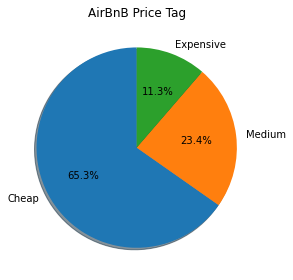

In [53]:
slices = [31910,11440, 5545]
labels = ['Cheap', 'Medium', 'Expensive']
explode = [0,0,0]

plt.pie(slices, labels=labels,
        explode=explode, shadow=True, startangle=90, autopct='%1.1f%%')

plt.title('AirBnB Price Tag')
plt.tight_layout()
#plt.savefig('pie.png')
plt.show()

# Most Common Area

In [59]:
import seaborn as sns

com=bnb['neighbourhood_group'].value_counts()
com

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [72]:
common=pd.DataFrame(com)
common

,neighbourhood_group
Manhattan,21661
Brooklyn,20104
Queens,5666
Bronx,1091
Staten Island,373


In [73]:
common.reset_index(inplace=True)
common

,index,neighbourhood_group
0,Manhattan,21661
1,Brooklyn,20104
2,Queens,5666
3,Bronx,1091
4,Staten Island,373


In [77]:
common.columns=['Neigborhood','Total visitor']
Neigh = common['Neigborhood']
ToVis = common['Total visitor']
common

,Neigborhood,Total visitor
0,Manhattan,21661
1,Brooklyn,20104
2,Queens,5666
3,Bronx,1091
4,Staten Island,373


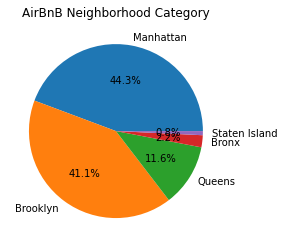

In [108]:
plt.pie(ToVis, labels=Neigh, autopct='%1.1f%%')
plt.title('AirBnB Neighborhood Category')
plt.show()

# The Most Room Type

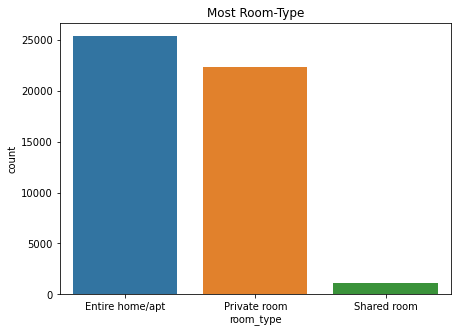

In [109]:
plt.figure(figsize=(7,5))
sns.countplot(bnb['room_type'], order = bnb['room_type'].value_counts().index)
plt.title('Most Room-Type')
plt.show()